In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
import os

In [2]:
train_df = pd.read_csv('severstal-steel-defect-detection/train.csv')

In [3]:
train_df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ImageId        7095 non-null   object
 1   ClassId        7095 non-null   int64 
 2   EncodedPixels  7095 non-null   object
dtypes: int64(1), object(2)
memory usage: 166.4+ KB


In [5]:
train_df.isnull().sum()

ImageId          0
ClassId          0
EncodedPixels    0
dtype: int64

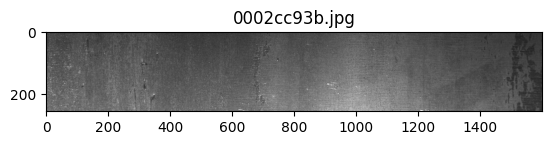

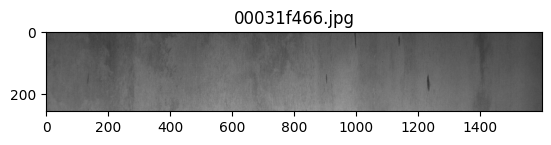

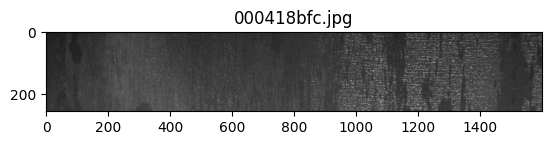

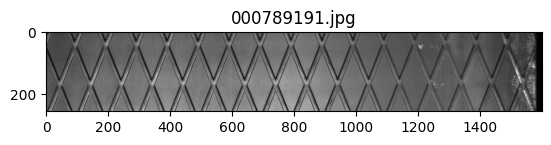

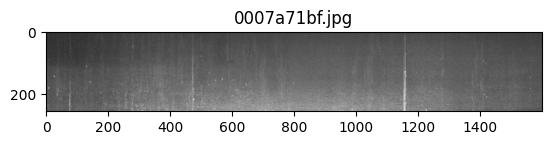

In [6]:
def plot_sample_images(image_dir, num_samples=5):
    sample_images = os.listdir(image_dir)[:num_samples]
    for image_file in sample_images:
        img = Image.open(os.path.join(image_dir, image_file))
        plt.imshow(img)
        plt.title(image_file)
        plt.show()

# Plot sample images
plot_sample_images('severstal-steel-defect-detection/train_images')

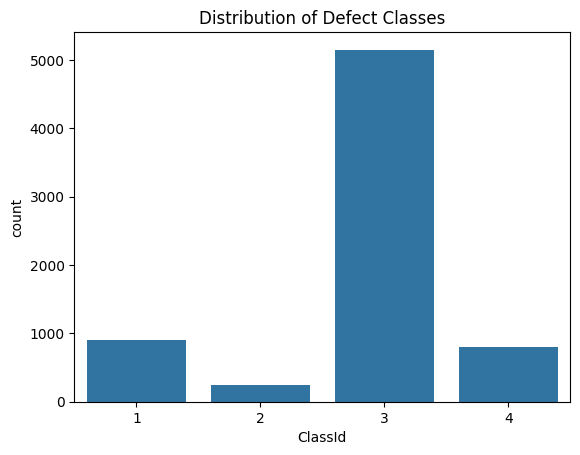

In [7]:
# Plot defect in each classes
sns.countplot(data=train_df, x='ClassId')
plt.title('Distribution of Defect Classes')
plt.show()

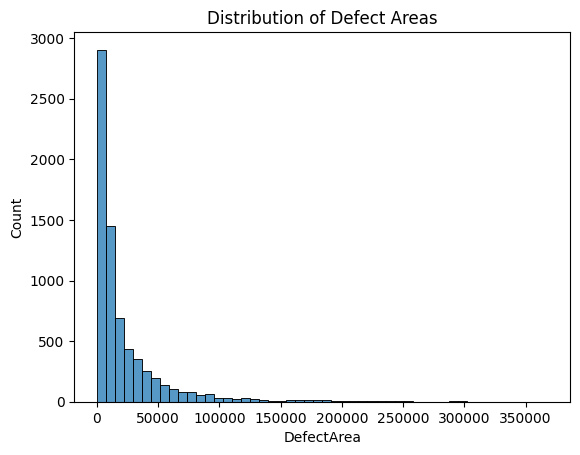

In [8]:
def defect_area(encoded_pixels):
    if pd.isna(encoded_pixels):
        return 0
    return sum([int(x) for x in encoded_pixels.split()[1::2]])

train_df['DefectArea'] = train_df['EncodedPixels'].apply(defect_area)

# Plot the distribution of defect areas
sns.histplot(data=train_df, x='DefectArea', bins=50)
plt.title('Distribution of Defect Areas')
plt.show()

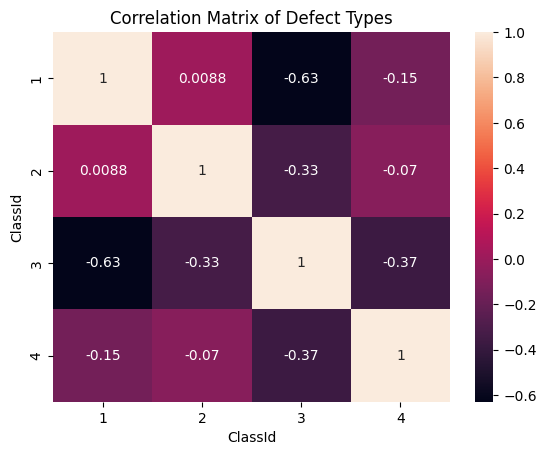

In [9]:
# Create a pivot table to count the number of defects per image
pivot_df = train_df.pivot_table(index='ImageId', columns='ClassId', values='EncodedPixels', aggfunc='count', fill_value=0)
correlation_matrix = pivot_df.corr()

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Defect Types')
plt.show()